---

# CAFE CHATBOT USING NLP AND PYTORCH
---

#### Importing all the required libraries

In [23]:
# Import NumPy library for numerical computing, aliased as "np"
import numpy as np
import random
# Import the JSON module for working with JSON data
import json
#Import necessary modules from PyTorch for deep learning tasks
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
#Import NLTK libraries for text processing
import nltk
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.tokenize import word_tokenize
stemmer = SnowballStemmer("english")
import random
import json
# Import Pandas library for data manipulation and analysis, aliased as "pd"
import pandas as pd

### Data Collection

In [24]:
# Load data from 'food.csv' into a Pandas DataFram
ds=pd.read_csv('food.csv')
ds

,id,times_appeared,food_rating
0,Chocolate and Vanila Combo,9,2
1,Avocado Shake,116,2
2,Apple pomegranate juice,13,2
3,Drumstick Milkshake,41,2
4,Pumpkin Shake,68,1
...,...,...,...
60,French Coffee,135,0
61,Iced Coffee Late,749,2
62,Irish Coffee,1479,1
63,Latte Macchiato,270,2


#### Data Preprocessing

In [25]:
#Data Cleaning,Removing missing values from the dataset
ds.dropna()

,id,times_appeared,food_rating
0,Chocolate and Vanila Combo,9,2
1,Avocado Shake,116,2
2,Apple pomegranate juice,13,2
3,Drumstick Milkshake,41,2
4,Pumpkin Shake,68,1
...,...,...,...
60,French Coffee,135,0
61,Iced Coffee Late,749,2
62,Irish Coffee,1479,1
63,Latte Macchiato,270,2


In [26]:
#Display descriptive statistics of the DataFrame
display(ds.describe())

,times_appeared,food_rating
count,65.000000,65.000000
mean,335.969231,1.215385
std,755.967281,0.892544
min,1.000000,0.000000
25%,9.000000,0.000000
50%,64.000000,2.000000
75%,270.000000,2.000000
max,4691.000000,2.000000


#### Getting the most appeared items

In [27]:
#Reading the variables of X and Y
x_input="times_appeared"
X=ds[x_input]
x_input1="food_rating"
X1=ds[x_input1]
#Store the label in Y
y="id"
Y=ds[y]


In [28]:
X

0        9
1      116
2       13
3       41
4       68
      ... 
60     135
61     749
62    1479
63     270
64      20
Name: times_appeared, Length: 65, dtype: int64

### Exploratory Data Analysis

#### Visualizing the Number of Times Each Item Appeared

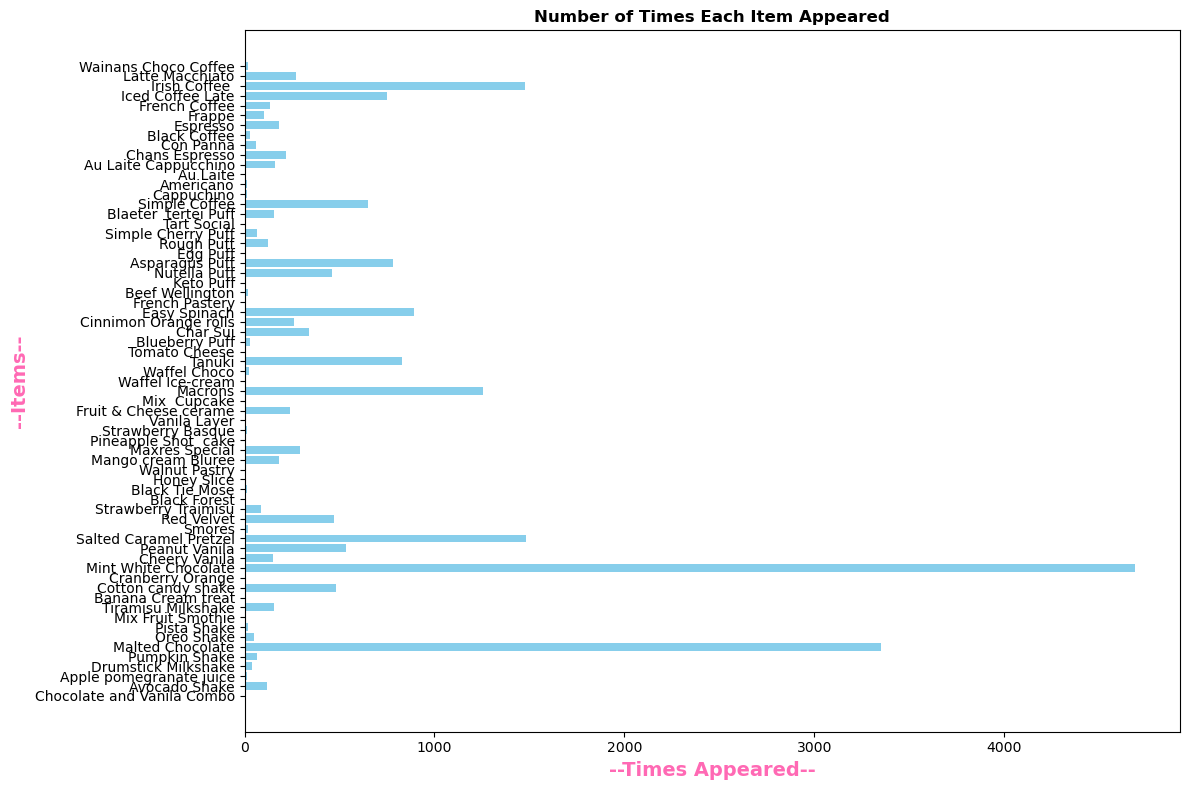

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.barh(Y,X, color='skyblue')
plt.xlabel('--Times Appeared--',color='HOTPINK',fontsize=14,fontweight='bold')
plt.ylabel('--Items--',color='HOTPINK',fontsize=14,fontweight='bold')
plt.title('Number of Times Each Item Appeared',fontweight='bold')
plt.tight_layout()

# Show plot
plt.show()


#### Visualizing the Top 5 Most Appeared Items using matplot library


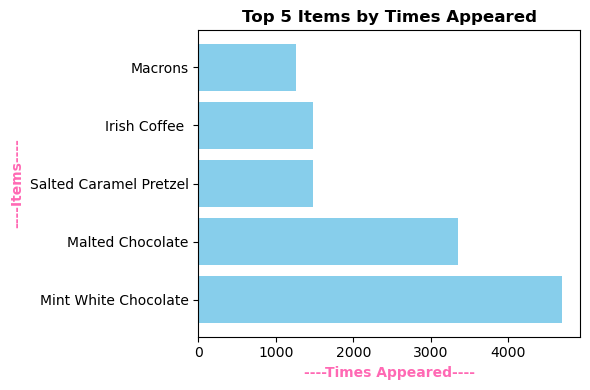

In [30]:
import matplotlib.pyplot as plt

# Sort based on times appeared and select top 5
top_items = sorted(zip(Y, X), key=lambda x: x[1], reverse=True)[:5]

# Unzip the top items back into separate lists
Y_top = [item[0] for item in top_items]
X_top = [item[1] for item in top_items]

# Create a horizontal bar plot for the top 5 items
plt.figure(figsize=(6, 4))
plt.barh(Y_top, X_top, color='skyblue')
plt.xlabel('----Times Appeared----',color='hotpink',fontweight='bold')
plt.ylabel('----Items----',color='hotpink',fontweight='bold')
plt.title('Top 5 Items by Times Appeared',fontweight='bold')
plt.tight_layout()

# Show plot
plt.show()


###  Text preprocessing and Feature Engineering for NLP Pipeline


#### Bag of words

In [31]:
#bagofwords
#This function converts a tokenized sentence into a bag of words representation
def bagofwords(t_sentence, words):
    # Stemming the words in the tokenized sentence
    s_words = [stemmer.stem(w) for w in t_sentence]
    # initialize bag with 0 
    b = np.zeros(len(words), dtype=np.float32)
    for index, w in enumerate(words):
        if w in s_words: 
            b[index] = 1

    return b

#### Tokenisation, Stemming for Intents

In [32]:
# Open and load the intents JSON file
with open('intents.json', 'r') as f:
    intents = json.load(f)
# Initialize lists to store words, tags, and pairs
a_words = []
tags = []
pairs = []
# Extract words, tags, and pairs from intents
for i in intents['intents']:
    t = i['tag']
    tags.append(t)
    for p in i['patterns']:
        #tokenisation
        word = word_tokenize(p)
        #words list
        a_words.extend(word)
        #pairs
        pairs.append((word, t))

#ignore all punctuations
ignwords = ['?', '.', '!','&']
#stemming
a_words_stemmed = []
for w in a_words:
    if w not in ignwords:
        a_words_stemmed.append(stemmer.stem(w))
        

#duplicates and sorting
allwords = sorted(set(a_words_stemmed))
tags = sorted(set(tags))


In [33]:
print(len(pairs), "patterns")
print(len(tags), "tags:", tags)
print(len(allwords), "unique stemmed words:", allwords)

172 patterns
24 tags: ['Baked goods', 'Coffee items', 'Coffee_Items', 'Cold_Drinks', 'Menu_Items', 'Nut_Allergies', 'Order_Item', 'Savory treats', 'Shakes', 'Shakes & Frappe', 'Soy-Free Options', 'Sugar-Free Desserts', 'Sweet Treats', 'Vegan_Options', 'feedback', 'funny', 'goodbye', 'greeting', 'items', 'location', 'payments', 'popular_items', 'request-cafe-hours', 'thanks']
298 unique stemmed words: ["'d", "'m", "'s", ',', '[', ']', 'a', 'about', 'accept', 'accommod', 'ad', 'address', 'advanc', 'allergi', 'also', 'altern', 'amaz', 'among', 'an', 'and', 'ani', 'anyon', 'appet', 'appreci', 'are', 'artifici', 'at', 'avail', 'avocado', 'bake', 'be', 'bean', 'best', 'bestsel', 'between', 'beverag', 'beyond', 'bit', 'black', 'blend', 'breakfast', 'brew', 'bye', 'cafe', 'can', 'card', 'cash', 'chill', 'classic', 'close', 'coffe', 'cold', 'contain', 'cook', 'cost', 'could', 'crave', 'credit', 'custom', 'customiz', 'dairi', 'dairy-fre', 'day', 'decaffein', 'delici', 'deliveri', 'describ', 'des


###  Training Data for the Model


In [34]:
#Training Data Preparation
X_train = []
y_train = []
# Iterate over pairs of tokenized patterns and tags
for (p,tag) in pairs:
    # Convert tokenized pattern to bag of words representation
    bag = bagofwords(p, allwords)
    label = tags.index(tag)
    X_train.append(bag)
    y_train.append(label)
# Convert lists to numpy arrays for model training
X_train = np.array(X_train)
y_train = np.array(y_train)


In [35]:
# Hyper-parameters 
learning_rate = 0.001
i_size = len(X_train[0])
h_size = 8
o_size = len(tags)


### Model build using torch

#### Neural Network Model for Classification

In [36]:
#NeuralNetwork
class NNet(nn.Module):
    def __init__(self, i_size, n_classes):
        super(NNet, self).__init__()
        self.l1 = nn.Linear(i_size, 8) 
        self.l2 = nn.Linear(8, 10) 
        self.l3 = nn.Linear(10, 6)
        self.l4 = nn.Linear(6, n_classes)
        # Define LeakyReLU with different negative slopes for each layer
        self.lrelu1 = nn.LeakyReLU(negative_slope=0.01)
        self.lrelu2 = nn.LeakyReLU(negative_slope=0.02)
        self.lrelu3 = nn.LeakyReLU(negative_slope=0.03)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.lrelu1(out)
        out = self.l2(out)
        out = self.lrelu2(out)
        out = self.l3(out)
        out = self.lrelu3(out)
        out = self.l4(out)
        return out

#### Custom Dataset and DataLoader Setup

In [37]:
class CDataset(Dataset):

    def __init__(self):
        self.x_data = X_train
        self.y_data = y_train

    
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    
    def __len__(self):
        self.n_samples = len(X_train)
        return self.n_samples

dataset = CDataset()
tloader = DataLoader(dataset=dataset,
                          batch_size=10,
                          shuffle=True,
                          num_workers=0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### Training of a model

In [38]:
m = NNet(i_size, o_size).to(device)

optimizer = torch.optim.Adam(m.parameters(), lr=learning_rate)

# Training and epochs
for epoch in range(1000):
    for (inputs, targets) in tloader:
        inputs = inputs.to(device)
        targets = targets.to(dtype=torch.long).to(device)
        
        # Forward pass
        predictions = m(inputs)
        loss = nn.CrossEntropyLoss()(predictions, targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/2000], Loss: {loss.item():.4f}')



Epoch [100/2000], Loss: 0.0293
Epoch [200/2000], Loss: 0.0018
Epoch [300/2000], Loss: 0.0013
Epoch [400/2000], Loss: 0.0000
Epoch [500/2000], Loss: 0.0000
Epoch [600/2000], Loss: 0.0000
Epoch [700/2000], Loss: 0.0000
Epoch [800/2000], Loss: 0.0000
Epoch [900/2000], Loss: 0.0000
Epoch [1000/2000], Loss: 0.0000


### Chatbot Initialization and Menu Creation

In [39]:
import spacy
import re
import time
import uuid
import pandas as pd

# Load the English language model from spaCy
nlp = spacy.load("en_core_web_sm")
# Define the name of the chatbot
bot_name = "chatbot"
# Initialize an empty list to store menu items and their prices
menu = []
# Read data from a CSV file containing item names and prices
df = pd.read_csv('Item_to_id.csv')
for index, row in df.iterrows():
    item_name = row['Name']
    price = row['Price']
    menu.append({"item_name": item_name, "price": price})

#### Cart Management and Display Functions

In [40]:
# Cart Management and Display Functions
cart = []
# Function to display the menu with items and their prices
def display_menu():
    print(f"{bot_name}: ")
    for idx, item in enumerate(menu, start=1):
        print(f"{idx}. {item['item_name']} - ${item['price']}")
    print("you can place an order by typing 'order <item>', add an item to your cart with 'add <quantity> <item>', proceed to checkout by typing 'checkout'.")
# Function to display the contents of the cart
def display_cart():
    print(f"{bot_name}: ")
    print("Cart:")
    if cart:
        for idx, item in enumerate(cart, start=1):
            print(f"{idx}. {item['item_name']} - ${item['price']}")
    else:
        print("Your cart is empty.you can place an order by typing 'order <item>', add an item to your cart with 'add <quantity> <item>', proceed to checkout by typing 'checkout'.")

#### Intent Processing Function

In [41]:
# This function processes user input to determine the intent and extract parameters.
def process_input(user_input):
    user_input = user_input.lower().strip()
    #based on the user input classifying the intent
    if user_input == 'menu':
        return {'intent': 'show_menu'}
    elif user_input == 'cart':
        return {'intent': 'show_cart'}
    elif user_input.startswith('order'):
        match = re.match(r'order\s+(.*)', user_input)
        if match:
            item_name = match.group(1).strip()
            matching_items = [item for item in menu if item['item_name'].lower() == item_name]
            if matching_items:
                if len(matching_items) > 1:
                    print(f"{bot_name}: Multiple items found with that name. Please specify.")
                    return {'intent': 'ambiguous_item_name', 'matching_items': matching_items, 'parameters': {'item_name': item_name}}
                else:
                    return {'intent': 'order_item', 'parameters': {'item_name': matching_items[0]['item_name']}}
            else:
                print(f"{bot_name}: Item not found in the menu.")
                return {'intent': 'unknown'}
    elif user_input.startswith('add'):
        match = re.match(r'add\s+(\d+)\s+(.*)', user_input)
        if match:
            return {'intent': 'add_to_cart', 'parameters': {'quantity': int(match.group(1)), 'item_name': match.group(2).strip()}}
    elif user_input == 'checkout':
        return {'intent': 'checkout'}
    elif user_input == 'exit':
        return {'intent': 'exit'}
    else:
        t_sentence = word_tokenize(user_input)
        X = bagofwords(t_sentence, allwords)
        X = X.reshape(1, X.shape[0])
        X = torch.from_numpy(X).to(device)

        out = m(X)
        _, pred = torch.max(out, dim=1)

        tag = tags[pred.item()]

        probs = torch.softmax(out, dim=1)
        prob = probs[0][pred.item()]
        if prob.item() > 0.75:
            found_tag = False
            for i in intents['intents']:
                if tag == i["tag"]:
                    responses = i['responses']
                    if len(responses) > 1:
                        print(f"{bot_name}: {random.choice(responses)}")
                    else:
                        print(f"{bot_name}: {responses[0]}")
                    found_tag = True
                    break
            if not found_tag:
                print(f"{bot_name}: I do not understand.")
        else:
            print(f"{bot_name}: I do not understand.")


In [42]:
# This function generates a unique transaction ID based on the current timestamp.
def generate_transaction_id():
    timestamp = int(time.time() * 1000)
    transaction_id = f"{timestamp}"
    return transaction_id

In [43]:
# Order Processing Function
# processing order based on the intent 
def process_order(intent, parameters):
    if intent == 'show_menu':
        display_menu()
    elif intent == 'show_cart':
        display_cart()
    elif intent == 'order_item':
        item_name = parameters.get('item_name')
        matching_items = [item for item in menu if item['item_name'].lower() == item_name.lower()]
        if matching_items:
            cart.append(matching_items[0])
            print(f"{bot_name}: Ordered {item_name}.")
            print("you can add an item to your cart with 'add <quantity> <item>', proceed to checkout by typing 'checkout'.")
        else:
            print(f"{bot_name}: Item not found in the menu.")
    elif intent == 'add_to_cart':
        quantity = parameters.get('quantity')
        item_name = parameters.get('item_name')
        matching_items = [item for item in menu if item['item_name'].lower() == item_name.lower()]
        if matching_items:
            cart.extend([matching_items[0]] * quantity)
            print(f"{bot_name}: Added {quantity} {item_name}(s) to cart.")
            print("You can proceed to checkout by typing 'checkout' or add an item to your cart with 'add <quantity> <item>'")
        else:
            print(f"{bot_name}: Item not found in the menu.")
    elif intent == 'checkout':
        print(f"{bot_name}: Processing checkout...")
        display_cart()
        total_price = sum(item['price'] for item in cart)
        print(f"Total: ${total_price}")
        id = generate_transaction_id()
        f = "feedback"
        print(f"{bot_name}: Thank you for your order!. Your order id is "+id + ". You can pay at the time of delivery. Please provide your feedback.") 
        cart.clear()
    elif intent == 'exit':
        print(f"{bot_name}: Exiting the chatbot...")
        return True
    else:
        print(f"{bot_name}: Sorry, I didn't understand.")

    return False


In [44]:
# This function processes user orders based on the intent and parameters provided.
def chatbot():
    print(f"{bot_name}: Welcome to the Chatbot!")
    print("You can type 'menu' to view the menu, 'order <item>' to order an item, 'add <quantity> <item>' to add an item to your cart, 'checkout' to proceed to checkout, or 'exit' to exit the chatbot.")

    while True:
        try:
            user_input = input("User: ")
            parsed_input = process_input(user_input)
            #print(parsed_input)  # Add this line for debugging
            if(parsed_input == None):
                pass
            else:
                exit_chatbot = process_order(parsed_input['intent'], parsed_input.get('parameters', {}))
                if exit_chatbot:
                    break
        except Exception as e:
            print(e)

# Start the chatbot
chatbot()



chatbot: Welcome to the Chatbot!
You can type 'menu' to view the menu, 'order <item>' to order an item, 'add <quantity> <item>' to add an item to your cart, 'checkout' to proceed to checkout, or 'exit' to exit the chatbot.
User: hi
chatbot: Hello, thanks for visiting
User: which items do u have
chatbot: We have a diverse menu featuring categorized sections like Coffee Classics,Hot drinks,Shakes & Frappe, Cold Drinks, Baked Goods, Sweet Treats, and Savory Eats. Browse through each section to discover your perfect choice!,You can type 'menu' to view the prices of items
User: menu
chatbot: 
1. Chocolate and Vanila Combo - $3.5
2. Avocado Shake - $4.0
3. Apple pomegranate juice - $5.0
4. Drumstick Milkshake - $4.0
5. Pumpkin Shake - $5.0
6. Malted Chocolate - $10.0
7. Oreo Shake - $10.0
8. Pista Shake - $12.0
9. Mix Fruit Smothie - $7.0
10. Tiramisu Milkshake - $5.0
11. Banana Cream treat - $3.0
12. Cotton candy shake - $2.5
13. Cranberry Orange - $3.0
14. Mint White Chocolate - $7.0
15. C

As a conclusion, the chatbot has been successfully implemented to facilitate ordering from a menu. Users can interact with the chatbot by viewing the menu, ordering items, adding items to their cart, proceeding to checkout, or exiting the chatbot. The chatbot functions smoothly, processing user input to determine intents and parameters, and providing appropriate responses and actions. Overall, the chatbot offers a convenient and user-friendly way for customers to browse and order items from the menu.